<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Salam, my name is Dmitrii. Happy to review your project! 🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1:</b>
    
<b>Overall Feedback</b> 
    
- Overall well done! I can see that a lot of effort has been made! Your project already looks really good and you accomplished impressive results.
    
    
- However, there are some comments/areas left to fix that will help you to make your project even better:
    - Double check data correctness.  
  
And of course, if you have any questions along the way, remember that you can always reach out to your tutor for any clarification.

I will wait for you to send me a new version of the project :)

    
</div>

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 
    
- No critical issues left, so your project has been accepted! 
- To learn further about A/B testing, I can recommend the following articles:
  - https://towardsdatascience.com/a-collection-of-a-b-testing-learning-resources-newbie-to-master-6bab1e0d7845 or this cool book "Trustworthy Online Controlled Experiments: A Practical Guide to A/B Testing"
  - https://www.dynamicyield.com/lesson/introduction-to-ab-testing/
    
Please keep up the great work and good luck on the next project! 
  
</div>

# Making Business Decisions Based on Data

# Project description:
We are working on a project for a big online store. Together with the marketing department, we complied a list of hypotheses that may help boost revenue. We need to prioritize these hypotheses, launch an A/B test, and analyze the results.

Data description
Data used in the first part of the project
/datasets/hypotheses_us.csv Download dataset
Hypotheses — brief descriptions of the hypotheses
Reach — user reach, on a scale of one to ten
Impact — impact on users, on a scale of one to ten
Confidence — confidence in the hypothesis, on a scale of one to ten
Effort — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.

/datasets/orders_us.csv Download dataset
transactionId — order identifier
visitorId — identifier of the user who placed the order
date — of the order
revenue — from the order
group — the A/B test group that the user belongs to
/datasets/visits_us.csv Download dataset
date — date
group — A/B test group
visits — the number of visits on the date specified in the A/B test group specified

Steps to take:
Step 1: Open the data file and study the general information.

Step 2: Prepare the data

We will view the data in more detail to convert them to the required types, replace the column names and find missing values.Find and eliminate errors in the data.
Step 3: Prioritizing Hypotheses

The task is to:
Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.
Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.
Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.
Step 4: A/B Test Analysis

Goal:
Our goal is to prioritize a list of hypotheses compiled and launch an A/B test, and analyze the results and determined which group is better.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Great that you added a detailed description of the project, data and tasks. The description of the project is an important part of the work, as it provides input for the reader (whether it be a peer reviewer or someone from business). At this stage, it is also useful to perform task decomposition.

# PART 1
Data preprocessing

Step 1. Open the data file and study the general information

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from datetime import timedelta
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
import datetime as dt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import warnings
warnings.filterwarnings('ignore')

hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

In [2]:
hypotheses.info()

hypotheses.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [3]:
hypotheses.columns = 'Hypothesis;Reach;Impact;Confidence;Effort'.split(';')

In [4]:
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [5]:
cols = ['Reach','Impact','Confidence','Effort']
hypotheses[cols] = hypotheses[cols].apply(pd.to_numeric, errors='coerce', axis=1)
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [6]:
pd.set_option('max_colwidth', -1)
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


# Part 1. Prioritizing Hypotheses
Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [7]:
hypotheses['ICE'] = ((hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']).round()
hypotheses = hypotheses.sort_values('ICE',  ascending=False )
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort,ICE
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.0


According to ICE framework hypothesis N8 is the most promising hypothesis - 'Show banners with current offers and sales on the main page. This will boost conversion'
N5, N3 and N4 are at the end of the list

In [8]:
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
hypotheses = hypotheses.sort_values('RICE',  ascending=False )
hypotheses.head(10)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.0,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.0,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.0,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.0,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.0,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.0,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.0,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.0,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.0,3.0


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>

You can add the following code to display full hypothesis name in the table: 
    
    pd.options.display.max_colwidth = 210
    
And also round the ICE metric.
     

According to RICE framework N7 is the most promising hypothesis. N4 is the most unreliable hypothesis

Show how the prioritization of hypotheses changes when you use RICE instead of ICE

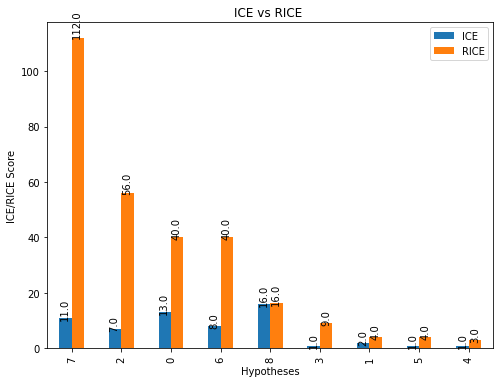

In [9]:
ax = hypotheses[['Hypothesis','ICE','RICE']].plot(kind='bar',stacked=False, figsize=(8,6))

for p in ax.patches:
    ax.annotate(str(p.get_height().round()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=90)
    
plt.title('ICE vs RICE ')
plt.xlabel('Hypotheses')
plt.ylabel('ICE/RICE Score')
plt.show()

The only difference between ICE and RICE framework is Reach Parameter. ICE has 3 components, RICE has four components (same as ICE + Reach), thats why we have different results. Based on both dataframes we can conclude that the most promising hypothesis (3d place for ICe and 1st place for RICE). the most unreliable hypothesis are N5 and N4

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Overall great job! The `ICE` and `RICE` frameworks have been calculated correctly. And from the results, it is now clear how the reach factor (Reach) affects the overall value of the hypothesis.

Additionally, it would be really cool to create a pair plot to compare all the metrics for each hypothesis and compare them.
    
For an outside reader (for example, a business customer) it would also be interesting to add a brief description of the frameworks and how they work.
    
Interesting examples of using these methods can be found here:
    https://hackernoon.com/finding-winning-ideas-using-the-confidence-tool-d8f2d8cc2c15

# Part 2
A/B Test Analysis

In [10]:
orders.info()
orders.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
95,372616894,457167155,2019-08-22,20.2,B
96,1170105516,2706377257,2019-08-01,140.8,A
97,2012801741,414545763,2019-08-01,90.5,B
98,1962247337,2706377257,2019-08-01,110.7,A


In [11]:
visits.info()
visits.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [12]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y.%m.%d')
visits['date'] = pd.to_datetime(visits['date'], format='%Y.%m.%d')

In [13]:
orders['date'].min()
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

In [14]:
orders = orders.drop_duplicates()
visits = visits.drop_duplicates()
orders = orders.dropna()
visits = visits.dropna()

In [15]:
print(visits.isna().sum())
print(orders.isna().sum())

date      0
group     0
visits    0
dtype: int64
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


In [16]:
orders['transactionId'].drop_duplicates()

0       3667963787
1       2804400009
2       2961555356
3       3797467345
4       2282983706
           ...    
1192    2662137336
1193    2203539145
1194    1807773912
1195    1947021204
1196    3936777065
Name: transactionId, Length: 1197, dtype: int64

In [17]:
print(orders['transactionId'].isna().sum())

0


no users belonging to both A and B groups

In [18]:
ordersA = orders[orders['group']=='A']
ordersB = orders[orders['group']=='B']
group_A = ordersA['visitorId'].unique()
users_duplicates_orders = ordersB[ordersB['visitorId'].isin(group_A)]
len(users_duplicates_orders)

92

In [19]:
orders_filt = orders[~orders['visitorId'].isin(users_duplicates_orders['visitorId'])]
len(orders_filt)

1016

In [20]:
orders_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>
    
It could be helpful to add a basic data validation. It could be interesting to check:

- Confirm the number of groups in the A/B test and for what period data is available to us (test start and end dates).
- Look at the distribution of the number of users in each group.
- Check if our users fall into both groups and decide what to do with them. You can check that using: 
    
    len(np.intersect1d(df_orders.query('group == "A"')['visitor_id'], df_orders.query(
'group == "B"')['visitor_id'], assume_unique = False))

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v2:</b>
    
You can additionally check the distribution in the following way: 
    
    print(orders.groupby(['group']).size())
    orders.groupby(['group']).size().plot(kind = "bar");

# 1.Graph cumulative revenue by group. Make conclusions and conjectures

In [21]:
datesGroups =  orders_filt[['date','group']].drop_duplicates()
datesGroups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [22]:
ordersAggregated = datesGroups.apply(lambda x: orders_filt[np.logical_and(orders_filt['date'] <= x['date'], orders_filt['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1


In [23]:
visitsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitsAggregated.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [24]:
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     23      19      2266.6   719     
1 2019-08-01  B     17      17      967.2    713     
2 2019-08-02  A     42      36      3734.9   1338    
3 2019-08-02  B     40      39      3535.3   1294    
4 2019-08-03  A     66      60      5550.1   1845    


In [25]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

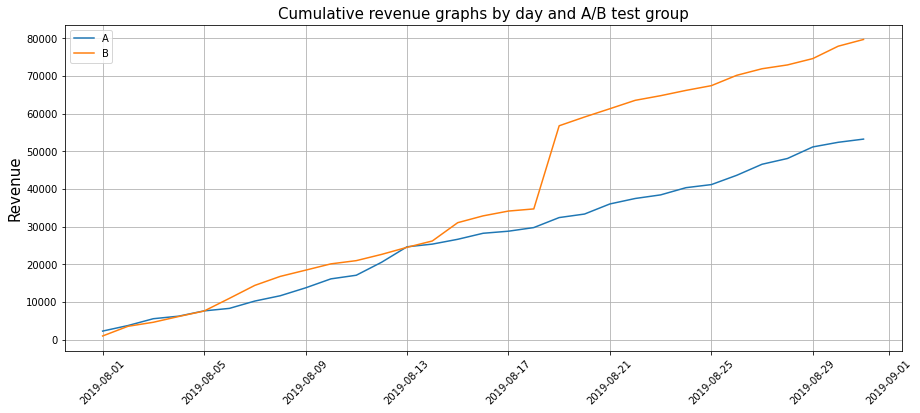

In [26]:
plt.figure(figsize=(15, 6))
plt.title('Cumulative revenue graphs by day and A/B test group', fontsize=15,)
plt.grid()
plt.xticks(rotation=45)
plt.ylabel('Revenue', fontsize=15)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend();

Conclusion
Revenue is rising steadily throughout the whole test which is a good sign. Also we can see that group B has spike in revenue 2019-08-19. This may imply either a surge in the number of orders or the presence of very expensive orders in the group B starting from that day

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Totally aggree with your results and conclusions.

# 2 Graph cumulative average order size by group. Make conclusions and conjectures.

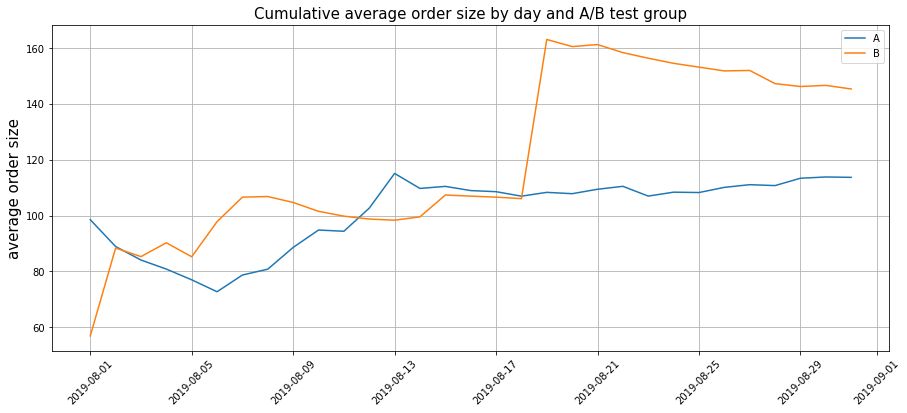

In [27]:
plt.figure(figsize=(15, 6))
plt.title('Cumulative average order size by day and A/B test group', fontsize=15,)
plt.grid()
plt.xticks(rotation=45)
plt.ylabel('average order size', fontsize=15)

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() ;

Conclusion:
We can see that during the whole period the average order size are changing (sometimes growing but sometimes falling down) for both groups. It stabilizes for group A starting from 2019-08-13. and keeps on falling for group B. The surge in group B on 19th of August tells us that most probably we were right in the previous section saying that we had a surge in the number of orders for group B that day.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Everything is correct here.
    


# 3.Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

In [28]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

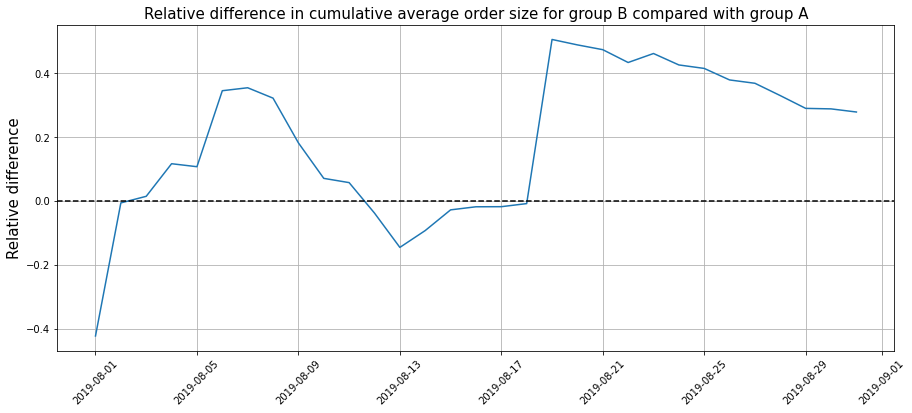

In [29]:
plt.figure(figsize=(15, 6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.ylabel('Relative difference', fontsize=15)
plt.xticks(rotation=45)
plt.title('Relative difference in cumulative average order size for group B compared with group A', fontsize=15,)
plt.grid();
plt.axhline(y=0, color='black', linestyle='--');

At several points the difference between the segments spikes. This means there might be some big orders and outliers. We can see a massive spike on 19th of August. As we've already seen on Cumulative average order size graph, there is a big spike in order size of group B that day. Also we see that the graph is below the axline between 11th August and 15th of August and 1-2d of August. This is the only time when group A had bigger order size than group B according to Cumulative average order size graph. Starting from 19th of August the graph is going down slowly.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Indeed it is better to check data without these outliers.

# 4.Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

In [30]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [31]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

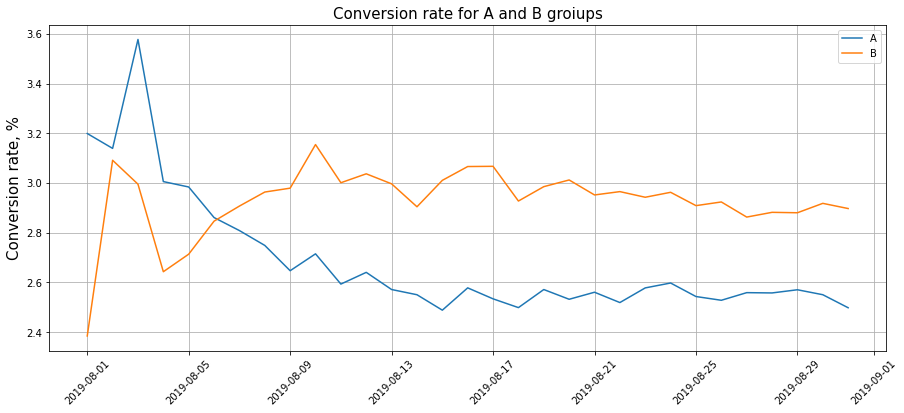

In [32]:
plt.figure(figsize=(15, 6))
plt.ylabel('Conversion rate, %', fontsize=15)
plt.xticks(rotation=45)
plt.title('Conversion rate for A and B groiups', fontsize=15,)
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion']*100, label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion']*100, label='B')
plt.legend();

We observe a very noticeable spike for both A and B groups on 1-2d of August. If we look at the previous plots at the same date, we see that there were not any raise in revenue nor in size of orders for A and B groups. So it might be some successful ad took place those days or a seasonal reason. The groups were fluctuating around the same value, so we can tell about stabilizing starting from 11th of August

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Correct results and conclusions, and based on this graph it is easier to say that group B is showing better results.

No handles with labels found to put in legend.


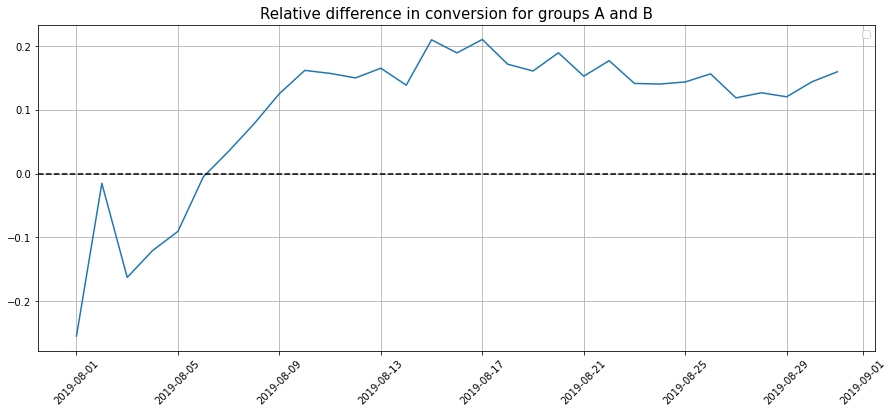

In [33]:
plt.figure(figsize=(15, 6))
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.legend()
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Relative difference in conversion for groups A and B', fontsize=15,)
plt.grid();

group A was lagging behind noticeably, but then it suddenly took the lead. Then its conversion fell again, and now it's growing gradually. The only period when conversion is below the average on the plot is 3-5th of August. In general, the conversion ratio tends to stabilize

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

It's great that you're correctly using plt.axhline. Indeed we can also mention some stabilization in the last days of the experiment. 

# 5.Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

In [34]:
ordersperId =  orders_filt.pivot_table(index=["visitorId"], values = "transactionId", aggfunc= "count").sort_values('transactionId', ascending=False).reset_index()
ordersperId.head()

,visitorId,transactionId
0,3967698036,3
1,249864742,3
2,2108163459,3
3,2988190573,3
4,3908431265,3


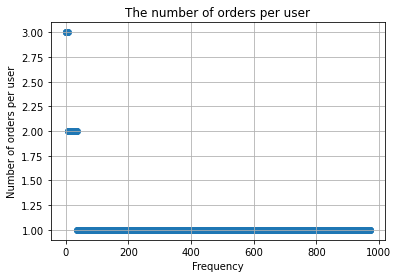

In [35]:
x_values = pd.Series(range(0, len(ordersperId['transactionId'])))
plt.scatter(x_values, ordersperId['transactionId']);
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Number of orders per user")
plt.title('The number of orders per user')
plt.show();

In [36]:
ordersperId['transactionId'].describe()

count    973.000000
mean     1.044193  
std      0.238090  
min      1.000000  
25%      1.000000  
50%      1.000000  
75%      1.000000  
max      3.000000  
Name: transactionId, dtype: float64

# 6.Calculate the 95th and 99th percentiles for the number of orders per user.Define the point at which a data point becomes an anomaly.

In [37]:
print(np.percentile(ordersperId['transactionId'], [95, 99])) 

[1. 2.]


No more than 5% of users made 2 orders, and no more than 1% users made more than 4 orders. Thus, it would be reasonable to set 2 orders per user as the lower limit for the number of orders and to filter anomalies on that basis.

# 7.Plot a scatter chart of order prices. Make conclusions and conjectures.

In [38]:
x_val = pd.Series(range(0, len(orders_filt['revenue'])))
orders =  orders_filt.sort_values(by='revenue',ascending=False)

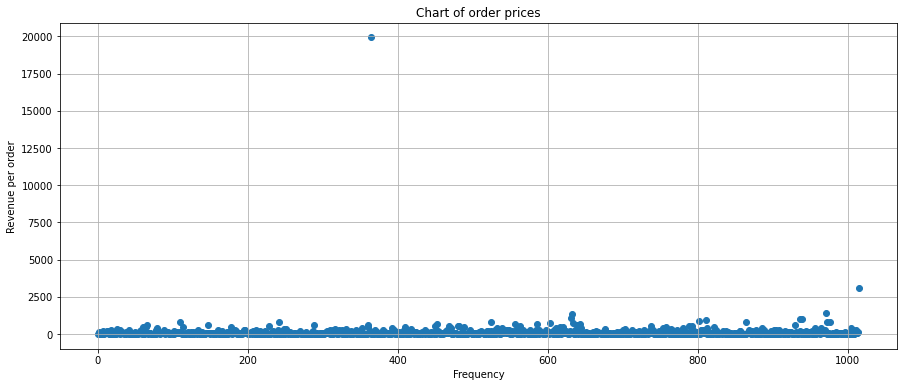

In [39]:
plt.figure(figsize=(15, 6))
plt.scatter(x_val,  orders_filt['revenue'])
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Revenue per order")
plt.title('Chart of order prices')
plt.show();

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Great scaterplots. Additionally you can color two groups on this graph using other 'hue' parameter (https://seaborn.pydata.org/generated/seaborn.scatterplot.html) or different data sources (https://moonbooks.org/Articles/How-to-create-a-scatter-plot-with-several-colors-in-matplotlib-/)
    
And also you could check another scaterplot but without outliers. 

In [40]:
 orders_filt['revenue'].describe()

count    1016.000000 
mean     130.770866  
std      648.079810  
min      5.000000    
25%      20.775000   
50%      50.100000   
75%      126.950000  
max      19920.400000
Name: revenue, dtype: float64

There are several big orders. We can set the limit for abnormal orders: around 20000 and around 3000. Generally, the most of the prices are less than 130.

# 8.Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [41]:
print(np.percentile( orders_filt['revenue'], [93, 95, 99])) 

[310.195 414.275 830.3  ]


No more than 5% of orders cost more than 435.5, and no more than 1% cost more than 900.9. Thus, it would be possible to set an order price 350 as the lower limit to filter anomalies

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
You correctly identified 90, 95th and 99th percentiles. 

# 9.Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

Null Hypothesis H0: There is no statistically significant difference in conversion between groups A and B row data.
Alternative Hypothesis H1: There is a statistically significant difference in conversion between groups A and B row data.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Hypotheses have been formulated correctly.

In [42]:
ordersByUsersA =  orders_filt[ orders_filt['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB =  orders_filt[ orders_filt['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

In [43]:
alpha = .05
sampleA = pd.concat([ordersByUsersA['transactionId'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['transactionId'])), name='transactionId')],axis=0)
sampleB = pd.concat([ordersByUsersB['transactionId'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['transactionId'])), name='transactionId')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
if (stats.mannwhitneyu(sampleA, sampleB)[1]) < alpha:
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference") 
print("\n""{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.011
Null hypothesis rejected: the difference is statistically significant

0.160


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
It could be useful to label all your numbers in the print statement.

Conclusion:
there is a difference between groups A and B. The first row of the output gives us the p-value, 0.008, which is a less than significance level 0.05. So we can reject the null hypothesis that there's not a statistically significant difference in conversion between the groups. The relative conversion gain for group B compared with A is 13.8%. If we look at Relative difference plot in Question 4 we will see that Group B was the leader in conversion almost from the very beginning of the period. It gained steadily and almost stabilized 15% higher than group A. So relative difference is 10-15%

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Correct conclusions. 

# 10.Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures

Null Hypothesis H0: There is no statistically significant difference in average order size between groups A and B row data.
Alternative Hypothesis H1: There is a statistically significant difference in average order size between groups A and B row dat

In [44]:
print('{0:.3f}'.format(stats.mannwhitneyu( orders[ orders['group']=='A']['revenue'],  orders[ orders['group']=='B']['revenue'])[1]))
if ((stats.mannwhitneyu( orders[ orders['group']=='A']['revenue'],  orders[ orders['group']=='B']['revenue'])[1]) < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference") 

print("\n"'{0:.3f}'.format( orders[ orders['group']=='B']['revenue'].mean()/ orders[ orders['group']=='A']['revenue'].mean()-1)) 

0.862
Failed to reject the null hypothesis: we can't make conclusions about the difference

0.278


The p-value is considerably higher than 0.05, so there's no reason to reject the null hypothesis. Means, There are no statistically significant differences between the groups average order size. Nonetheless, the average order size for group B is much bigger than it is for group A (25%) so we can observe it in question 3 on the plot. We cant draw any definite conclusion from that graph about stabilizing the group B.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Also, everything is correct.

# 11.Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

Null Hypothesis H0: There is no statistically significant difference in conversion between groups A and B filtered data.
Alternative Hypothesis H1: There is a statistically significant difference in conversion between groups A and B filtered data.

In [45]:
ordersByUsersA_filt = ordersByUsersA.loc[ordersByUsersA['transactionId'] <2]
ordersByUsersB_filt = ordersByUsersB.loc[ordersByUsersB['transactionId'] <2]

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
It would be helpful not to hard code thresholds. This will help avoid mistakes in the future, especially if the project needs to be run on new data.

In [46]:
alpha = .05
sampleA_filt = pd.concat([ordersByUsersA_filt['transactionId'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA_filt['transactionId'])), name='transactionId')],axis=0)
sampleB_filt = pd.concat([ordersByUsersB_filt['transactionId'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB_filt['transactionId'])), name='transactionId')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA_filt, sampleB_filt)[1]))
if ((stats.mannwhitneyu(sampleA_filt, sampleB_filt)[1]) < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference") 
print("\n""{0:.3f}".format(sampleB_filt.mean()/sampleA_filt.mean()-1))

0.009
Null hypothesis rejected: the difference is statistically significant

0.183


The results for conversion didn't change much compare to row data (p-value was 0.008 and the difference between the segments was 0.138)

# 12.Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

Null Hypothesis H0: There is no statistically significant difference in average order size between groups A and B filtered data.
Alternative Hypothesis H1: There is a statistically significant difference in average order size between groups A and B filtered data.

In [47]:
orders_f =  orders_filt.loc[ orders_filt['revenue'] < 350]

In [48]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders_f[orders_f['group']=='A']['revenue'], orders_f[orders_f['group']=='B']['revenue'])[1]))
if (stats.mannwhitneyu(orders_f[orders_f['group']=='A']['revenue'], orders_f[orders_f['group']=='B']['revenue'])[1]) < alpha:
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference") 

print("\n"'{0:.3f}'.format(orders_f[orders_f['group']=='B']['revenue'].mean()/orders_f[orders_f['group']=='A']['revenue'].mean()-1)) 

0.729
Failed to reject the null hypothesis: we can't make conclusions about the difference

-0.063


Again the p-value is is higher than significance level, so we can conclude that average order size doesnt differ between the groups. Now the difference between the segments is only 4% (vs 25%). It shows that anomalies does affect the A/B test results

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
You got correct results for all tests.


# 13. Make a decision based on the test results. The possible decisions are: -Stop the test, consider one of the groups the leader. - Stop the test, conclude that there is no difference between the groups.- Continue the test.

Conclusions from the test:

There's a statistically significant difference in conversion between the groups, according to both the raw and the filtered data.
Both the raw data and the filtered data didn't show a statistically significant difference between the groups in terms of average purchase size
In terms of relative difference group B was stabilized about 15% higher than group A.
Based on these facts we can stop the test considering group B as the leader that can boost the revenue.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> 



Thank you for your work 🤝

You did a great research with correct intermediate conclusions, clean code and good visualization. You managed to correctly apply the frameworks for testing hypotheses, identify anomalies in the data and perform all the statistical tests.

I also fully agree with your test results. In this project, you can fall into the "peeking problem" and wait until there is a difference in metrics, but doing so is wrong. You can read more here: https://gopractice.io/blog/peeking-problem/#:~:text=by%20Oleg%20Yakubenkov-,Peeking%20problem%20%E2%80%93%20the%20fatal%20mistake%20in%20A%2FB%20testing%20and,A%2FB%20test%20is%20over
    


    
</div>